<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Add your code below following the instructions given in the course to complete the peer graded assignment


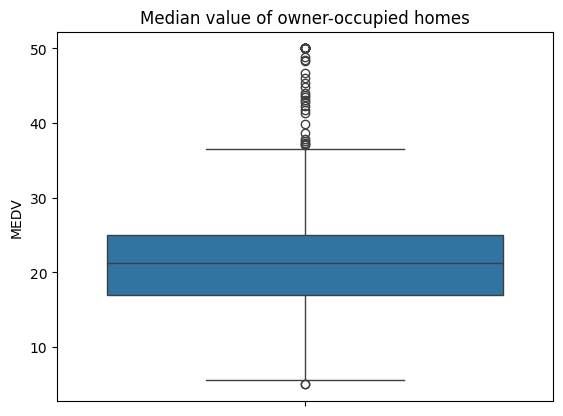

In [59]:
ax = sns.boxplot(y="MEDV", data=boston_df).set_title("Median value of owner-occupied homes")

boxplot shows the median value is around 20 and the dots represent the outliers

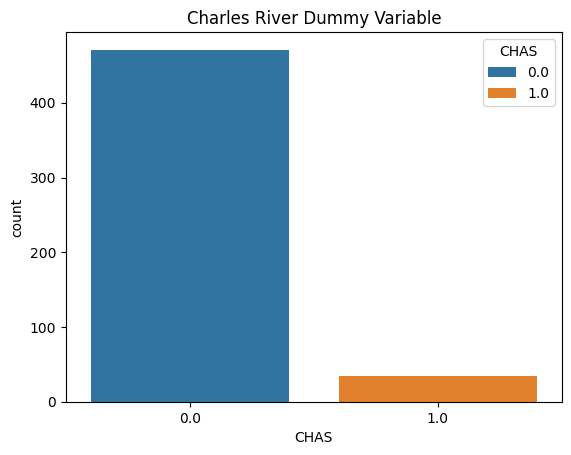

In [60]:
ax = sns.countplot(x='CHAS', data=boston_df, hue="CHAS").set_title('Charles River Dummy Variable');

1 = tract bounds river, 0 = Otherwise

Barplot shows there are more value in 0 bar which is "tract does not bound river" group

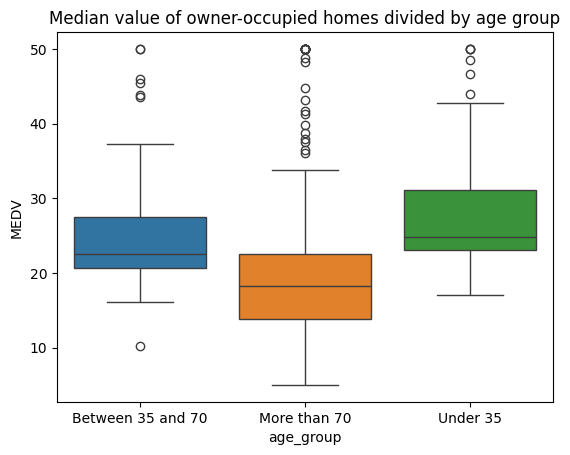

In [61]:
boston_df.loc[boston_df["AGE"]<35,"age_group"] = "Under 35"
boston_df.loc[(boston_df["AGE"]>35) & (boston_df["AGE"]<70),"age_group"] = "Between 35 and 70"
boston_df.loc[boston_df["AGE"]>70,"age_group"] = "More than 70"

ax = sns.boxplot(x="age_group", y="MEDV", data=boston_df, hue="age_group").set_title("Median value of owner-occupied homes divided by age group")

boxplot shows Under 35 group have higher median value, this indicate that they are more expensive

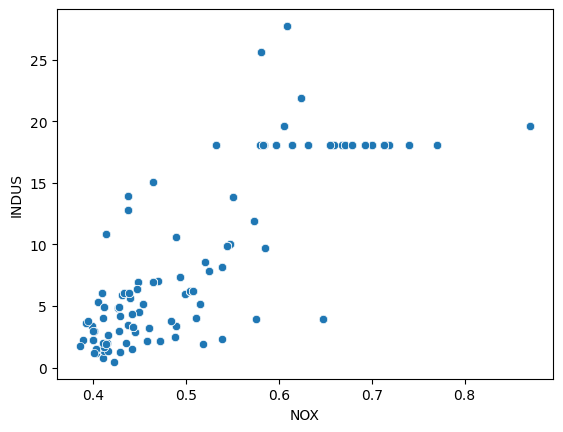

In [62]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)

scatterplot shows that there is a positive correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town

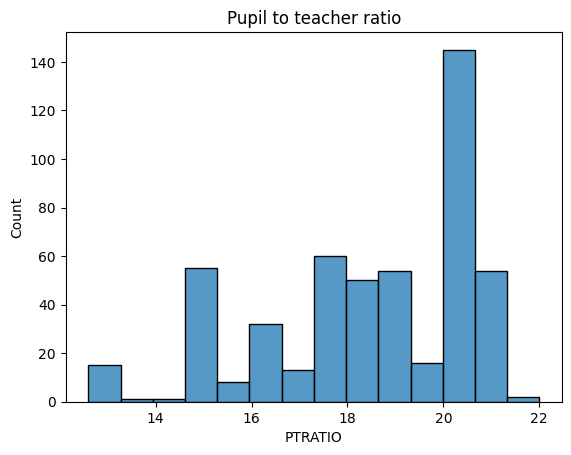

In [63]:
ax = sns.histplot(boston_df, x = 'PTRATIO').set_title("Pupil to teacher ratio")

histogram shows that mode is around the 20 bin, median is between 18 and 20 and mean is less than median

## TASK 3 ##

#### 1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples) ####

- Null Hypothesis: There is no significant difference in median value of houses bounded by the Charles river
- Alternate Hypothesis: There is significant difference in median value of houses bounded by the Charles river

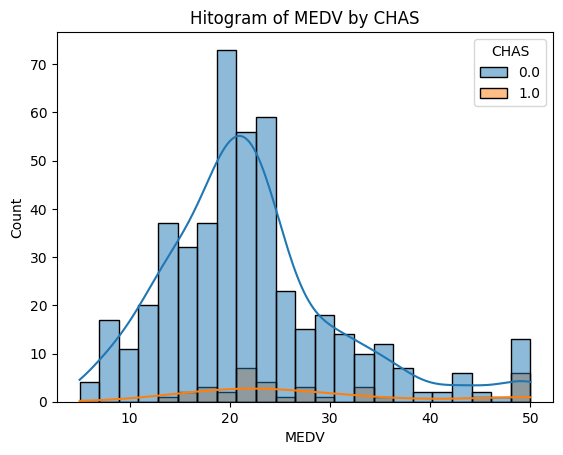

In [64]:
ax = sns.histplot(boston_df, x='MEDV', hue = 'CHAS', kde = True).set_title('Hitogram of MEDV by CHAS')

In [51]:
scipy.stats.levene(boston_df[boston_df['CHAS']==0]['MEDV'],boston_df[boston_df['CHAS']==1]['MEDV'], center = 'mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

p-value is lower than 0.05 and the variance is not equal, so we can proceed with the T test

In [52]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

p value is lower than 0.05, the median values of houses bounded by the Charles river not have significant difference.

#### 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA) ####

- Null Hypothesis: there is no difference of Median values of houses
- Alternate Hypothesis: there is significant difference of Median values of houses

In [69]:
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table = sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


p value is lower than 0.05, the median values of houses by different age groups are significantly different.

#### 3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation) ####

- Null Hypothesis: there is no relationship between NOX and INDUS
- Alternate Hypothesis: there is relationship between NOX and INDUS

In [71]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

p-value is lower than 0.05, there is relationship between NOX and INDUS variable

#### 4. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis) ####

In [75]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        15:50:38   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""